This notebook is aimed at giving a walkthrough of this simulator

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from register import QuantumRegister
from gate import QuantumGate
from utils import plot_counts
import matplotlib.pyplot as plt

import math

## Initialising a Quantum Register

In [3]:
quantum_reg = QuantumRegister(5)

In [4]:
quantum_reg.get_register_size()

5

In [5]:
counts = quantum_reg.measure(100)

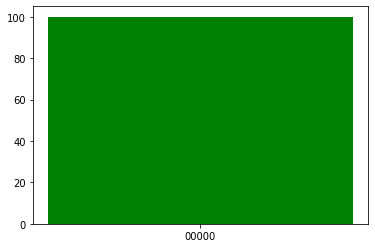

In [6]:
plot_counts(counts)

As you can see, all of our qubits are in ground state.

## Let's put some qubits into superposition!

In [7]:
quantum_reg.reset()
quantum_reg.add_gate(QuantumGate('h'), [0, 3])

In [8]:
quantum_reg.apply()

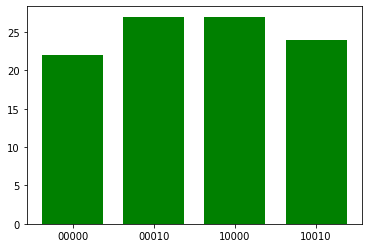

In [9]:
plot_counts(quantum_reg.measure(100))

As expected, the two qubits in superposition collapsed to all four possible permuations of state collapse. (Notice that indexing here is big endian).

## How about we entangle some qubits now?

In [10]:
# First, we reset our circuit
quantum_reg.reset()

quantum_reg.add_gate(QuantumGate('h'), [0])
quantum_reg.add_gate(QuantumGate('cx'), [0, 1]) # Attempting Bell state |B_00>

In [11]:
quantum_reg.apply()

In [12]:
quantum_reg.get_statevector()

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j])

We can see that we have a superposition of two states, which is what we expect.

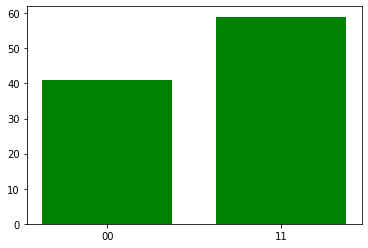

In [13]:
plot_counts(quantum_reg.measure(100, [0, 1])) # Let's measure the qubits we entangled alone!

Success!

## Let's try out some of the different gates available!

### CNOT Gate

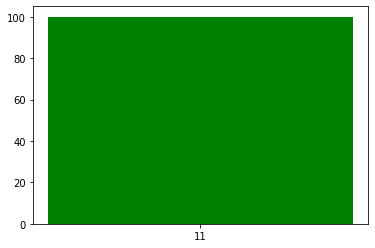

In [14]:
quantum_reg = QuantumRegister(2)

quantum_reg.initialise_qubit(0, QuantumRegister.one) # Initialise the control qubit to one

quantum_reg.add_gate(QuantumGate('cx'), [0, 1])

quantum_reg.apply()

plot_counts(quantum_reg.measure(100, [0, 1]))

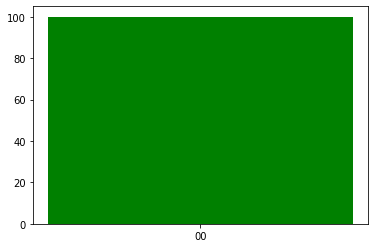

In [15]:
quantum_reg.reset()

quantum_reg.add_gate(QuantumGate('cx'), [0, 1])

quantum_reg.apply()

plot_counts(quantum_reg.measure(100, [0, 1])) # The target remains unchanged

### SWAP Gate

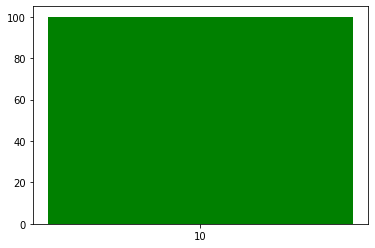

In [16]:
quantum_reg = QuantumRegister(2)

quantum_reg.initialise_qubit(0, QuantumRegister.one) # Initialise one of qubits to one

plot_counts(quantum_reg.measure(100, [0, 1]))

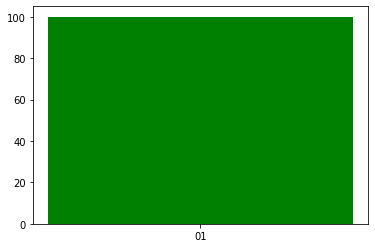

In [17]:
quantum_reg.add_gate(QuantumGate('swap'), [0, 1])

quantum_reg.apply()

plot_counts(quantum_reg.measure(100, [0, 1])) # The qubits are swapped

### Pauli operators

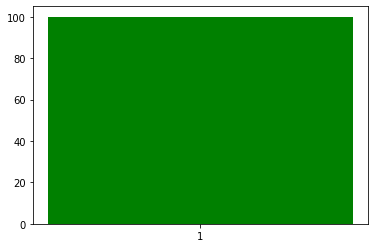

In [18]:
quantum_reg = QuantumRegister(1) 

quantum_reg.add_gate(QuantumGate('x'), [0])

quantum_reg.apply()

plot_counts(quantum_reg.measure(100, [0])) # The target remains unchanged

[ 0.+0.j -1.+0.j]


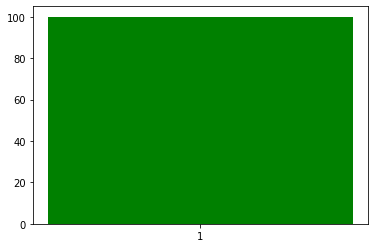

In [19]:
quantum_reg.add_gate(QuantumGate('z'), [0])

quantum_reg.apply()

print(quantum_reg.get_statevector())
plot_counts(quantum_reg.measure(100, [0])) # Same measurement, statevector has phase

[0.+1.j 0.+0.j]


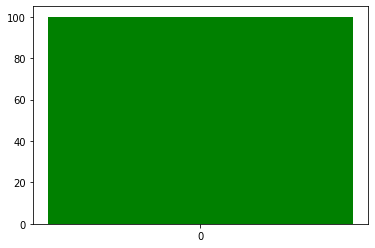

In [20]:
quantum_reg.add_gate(QuantumGate('y'), [0])

quantum_reg.apply()

print(quantum_reg.get_statevector())
plot_counts(quantum_reg.measure(100, [0])) # Swapped measurement, phase changed

### Parametric Gates (Rx, Ry, Rz, U3)

Let's attempt to create a Hadamard gate using different combinations of the Rx, Ry, and Rz gates.

#### Using Rx and Ry

[0.-0.70710678j 0.-0.70710678j]


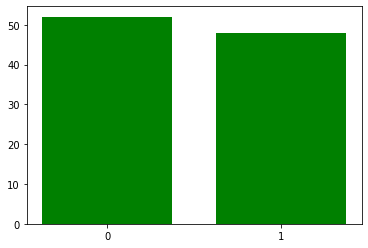

In [21]:
quantum_reg = QuantumRegister(1)

pi = math.pi
quantum_reg.add_gate(QuantumGate('ry', pi / 2), [0]) # As shown, the gate now takes the parameter theta
quantum_reg.add_gate(QuantumGate('rx', pi), [0])

quantum_reg.apply()

print(quantum_reg.get_statevector()) # -i phase will be present

plot_counts(quantum_reg.measure(100, [0]))

#### Using Ry and Rz gates

[0.-0.70710678j 0.-0.70710678j]


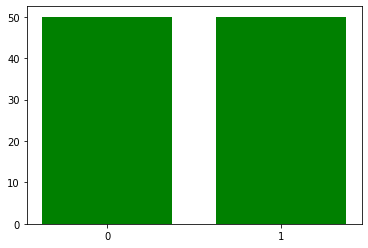

In [22]:
quantum_reg.reset()

quantum_reg.add_gate(QuantumGate('ry', -pi / 2), [0]) # As shown, the gate now takes the parameter theta
quantum_reg.add_gate(QuantumGate('rz', pi), [0])

quantum_reg.apply()

print(quantum_reg.get_statevector()) # -i phase will be present

plot_counts(quantum_reg.measure(100, [0]))

Let's build the Pauli-Y gate using the universal U3 gate.

[0.+0.j 0.+1.j]


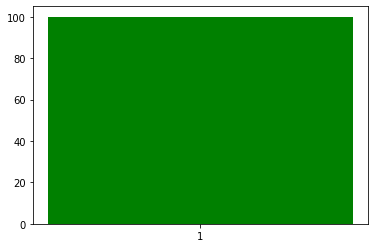

In [23]:
quantum_reg = QuantumRegister(1)

pi = math.pi

pauli_y = QuantumGate('u3', pi, pi/2, pi/2)
quantum_reg.add_gate(pauli_y, [0]) # U3 gate takes three parameters: theta, phi, lambda

quantum_reg.apply()

print(quantum_reg.get_statevector()) # -i phase will be present

plot_counts(quantum_reg.measure(100, [0]))